$$\huge{\textbf{Financial Sentimental Analysis}}$$

# Problem Statement

The main task is to detect the tone of the financial text i.e, positive,negative or neutral using Deep Learning approaches.

# Dataset description

The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one easy-to-use CSV file. It provides financial sentences with sentiment labels.

The link to download the dataset: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

# Methodology

The methodology of the assigment is going to includes the following

1. Data preprocessing:

Data preprocessing includes tokenization, vectorization and train test splitting of data for model training.

2. Models:

the models that are going to be used to train the data are:
 - Basic LSTM
 - Glove + LSTM
 - Glove + GRU
 - FastText + LSTM

## Data preprocessing

In [1]:
!pip install text_hammer
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import text_hammer as th
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91709\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("C:/Users/91709/Downloads/archive/data.csv")

In [7]:
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


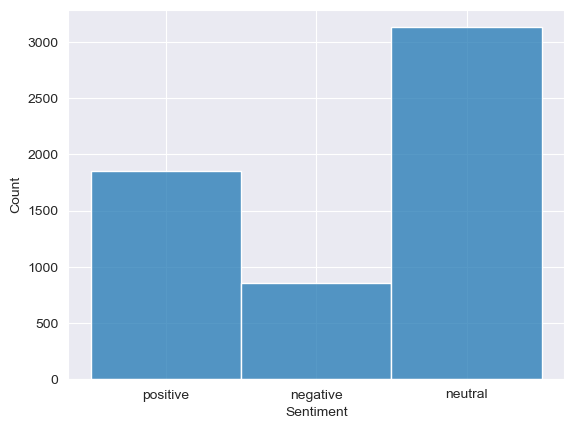

In [8]:
import seaborn as sns
sns.set_style('darkgrid')
sns.histplot(x='Sentiment',data=df)
plt.show()

In [9]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['Sentence']))
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23


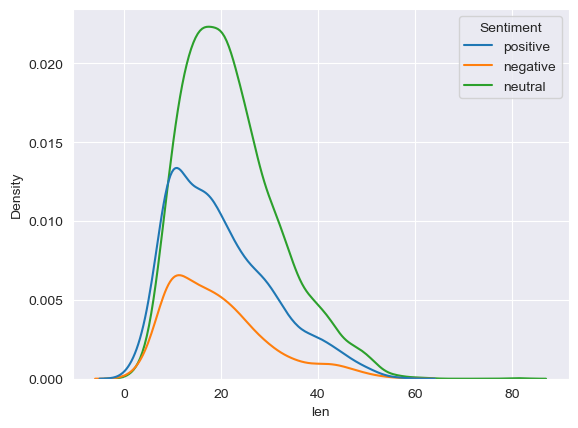

In [10]:
sns.kdeplot(x='len',hue='Sentiment',data=df)
plt.show()

In [11]:
mapdf = {'positive':0,'negative':1,'neutral':2}
df['Sentiment'] = list(map(lambda x:mapdf[x],df['Sentiment']))
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,0,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1,11
2,"For the last quarter of 2010 , Componenta 's n...",0,39
3,According to the Finnish-Russian Chamber of Co...,2,20
4,The Swedish buyout firm has sold its remaining...,2,23


In [12]:
print(df['Sentiment'].corr(df['len']))

0.10137114484667778


In [13]:
sentences = df['Sentence'].copy()[:]
sentences = sentences.to_list()
sentences = list(map(lambda x: x.lower(),sentences))
sentences = list(map(lambda x: th.cont_exp(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_html_tags(x),sentences))
sentences = list(map(lambda x: th.remove_stopwords(x),sentences))
sentences = list(map(lambda x: th.remove_special_chars(x),sentences))
sentences = list(map(lambda x: th.remove_accented_chars(x),sentences))
sentences = list(map(lambda x: th.make_base(x),sentences))

In [14]:
sentences[:3]

['geosolutions technology leverage benefon global positioning system solution provide location base search technology community platform location relevant multimedia content new powerful commercial model',
 'esi low 150 250 bk real possibility',
 'quarter 2010 componenta net sale double eur131 m eur76 m period year early move zero pretax profit pretax loss eur7 m']

In [15]:
pairs = []
for sent in tqdm(sentences):
    pairs.extend(nltk.word_tokenize(sent))
freq = nltk.FreqDist(pairs)
freq.most_common(10)

  0%|          | 0/5842 [00:00<?, ?it/s]

[('eur', 1284),
 ('company', 916),
 ('mn', 729),
 ('sale', 607),
 ('profit', 584),
 ('say', 574),
 ('finnish', 527),
 ('share', 514),
 ('net', 499),
 ('million', 493)]

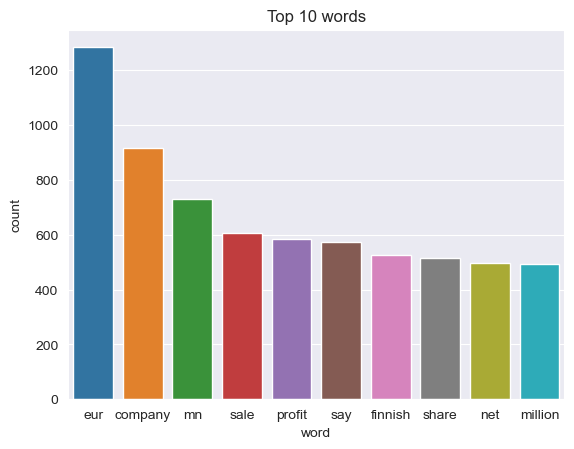

In [16]:
tempdf = pd.DataFrame(freq.most_common(10),  columns=['word', 'count'])
sns.barplot(x='word',y='count',data=tempdf)
plt.title("Top 10 words")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [18]:
y = to_categorical(df['Sentiment'])
x = sentences.copy()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

## Vectorization

In [26]:
!pip install keras

In [44]:
import tensorflow as tf
import keras 

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 12000
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([pd.Series(X_train), pd.Series(X_test)], axis = 0)
tokenizer.fit_on_texts(df_total)

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=81,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 81, padding = 'post')

In [48]:
print(X_train_pad.shape,X_test_pad.shape)

(4089, 81) (1753, 81)


## LSTM

In [49]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout

In [50]:
lstm = Sequential()
lstm.add(Embedding(input_dim = num_words,
                          output_dim = 100,
                          input_length= X_train_pad.shape[1]))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(256,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=False)))
lstm.add(Dense(64,activation='tanh'))
lstm.add(Dense(32,activation='tanh'))
lstm.add(Dense(10,activation='tanh'))
lstm.add(Dense(3,activation='softmax'))

In [51]:
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [56]:
lstm_history = lstm.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5050 - loss: 0.9925
Epoch 1: val_accuracy improved from -inf to 0.57273, saving model to ./model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 481ms/step - accuracy: 0.5053 - loss: 0.9921 - val_accuracy: 0.5727 - val_loss: 0.9012
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7302 - loss: 0.6637
Epoch 2: val_accuracy improved from 0.57273 to 0.67313, saving model to ./model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - accuracy: 0.7304 - loss: 0.6630 - val_accuracy: 0.6731 - val_loss: 0.7650
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8593 - loss: 0.3633
Epoch 3: val_accuracy did not improve from 0.67313
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.8592 - loss: 0.3635 - val_accuracy: 0.6509 - val_loss: 0.9144
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.8967 - loss: 0.2581
Epoch 4: val_accuracy did not improve from 0.67313
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 

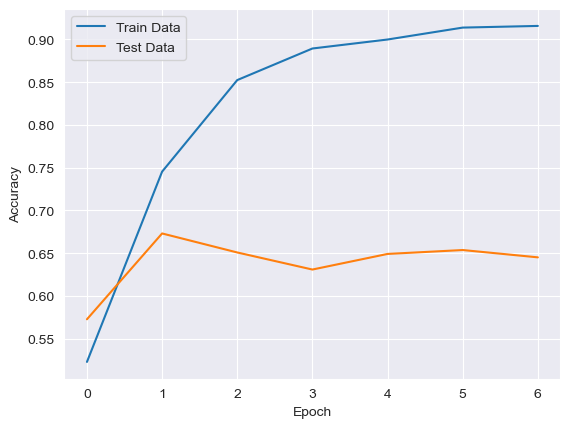

In [57]:
plt.plot(lstm_history.history['accuracy'], label='Train Data')
plt.plot(lstm_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

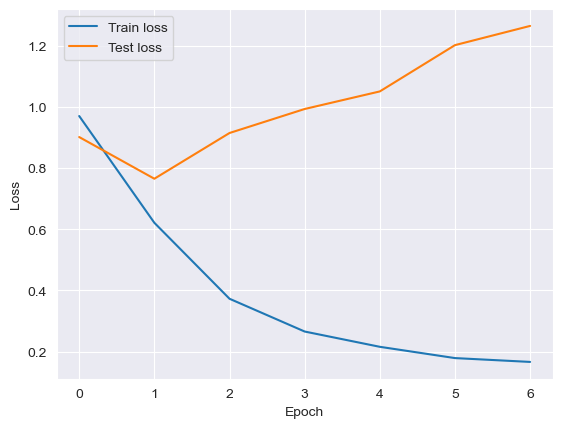

In [58]:
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [59]:
from sklearn.metrics import classification_report
predictions = lstm.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
              precision    recall  f1-score   support

    positive       0.71      0.64      0.67       556
    negative       0.31      0.29      0.30       258
     neutral       0.69      0.74      0.72       939

    accuracy                           0.65      1753
   macro avg       0.57      0.56      0.56      1753
weighted avg       0.64      0.65      0.64      1753



## Glove+LSTM

In [60]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300')

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.7% 66.5/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.6% 160.2/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.2% 248.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.2% 324.1/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.2% 361.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
glove_gensim.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.6713277101516724)]

In [62]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10910 [00:00<?, ?it/s]

In [63]:
gensim_weight_matrix.shape

(12000, 300)

In [64]:
glove = Sequential()
glove.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(256,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=False)))
glove.add(Dense(64,activation='tanh'))
glove.add(Dense(32,activation='tanh'))
glove.add(Dense(10,activation='tanh'))
glove.add(Dense(3,activation='softmax'))

In [65]:
glove.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [66]:
glove.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
glove_history = glove.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.5679 - loss: 0.9299
Epoch 1: val_accuracy did not improve from 0.67313
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 516ms/step - accuracy: 0.5686 - loss: 0.9288 - val_accuracy: 0.6469 - val_loss: 0.7815
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.6891 - loss: 0.7251
Epoch 2: val_accuracy improved from 0.67313 to 0.67712, saving model to ./model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 521ms/step - accuracy: 0.6890 - loss: 0.7251 - val_accuracy: 0.6771 - val_loss: 0.7634
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.7236 - loss: 0.6429
Epoch 3: val_accuracy improved from 0.67712 to 0.68340, saving model to ./model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.7234 - loss: 0.6431 - val_accuracy: 0.6834 - val_loss: 0.7166
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.7597 - loss: 0.5799
Epoch 4: val_accuracy improved from 0.68340 to 0.69994, saving model to ./model

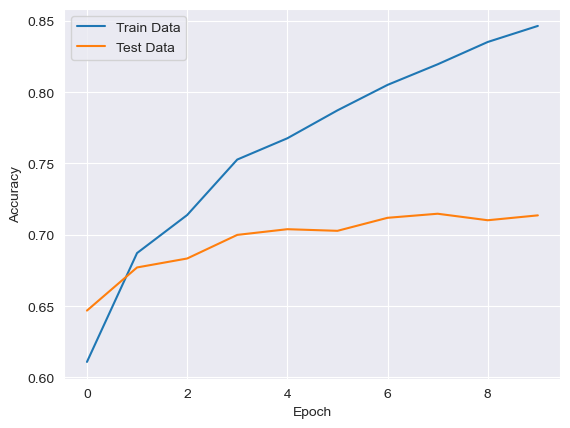

In [68]:
plt.plot(glove_history.history['accuracy'], label='Train Data')
plt.plot(glove_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.98, 1])
plt.legend(loc='best')
plt.show()

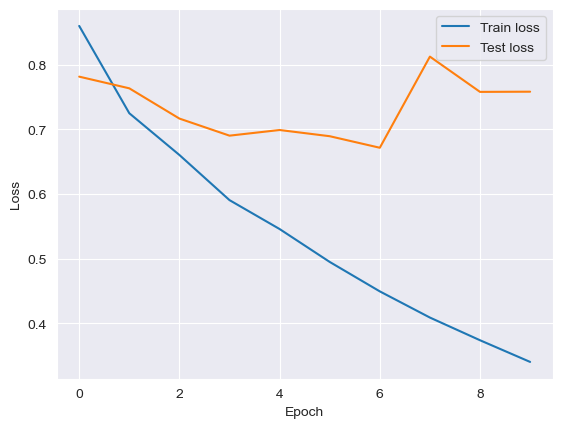

In [69]:
plt.plot(glove_history.history['loss'], label='Train loss')
plt.plot(glove_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [70]:
predictions = glove.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step
              precision    recall  f1-score   support

    positive       0.72      0.71      0.71       556
    negative       0.46      0.22      0.30       258
     neutral       0.74      0.85      0.79       939

    accuracy                           0.71      1753
   macro avg       0.64      0.59      0.60      1753
weighted avg       0.69      0.71      0.69      1753



## Glove+GRU

In [71]:
from keras.layers import GRU
gru = Sequential()
gru.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(256,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=False)))
gru.add(Dense(64,activation='tanh'))
gru.add(Dense(32,activation='tanh'))
gru.add(Dense(10,activation='tanh'))
gru.add(Dense(3,activation='softmax'))

In [72]:
gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [73]:
gru.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
gru_history = gru.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5518 - loss: 0.9275
Epoch 1: val_accuracy did not improve from 0.71477
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 419ms/step - accuracy: 0.5525 - loss: 0.9267 - val_accuracy: 0.6326 - val_loss: 0.8281
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6761 - loss: 0.7545
Epoch 2: val_accuracy did not improve from 0.71477
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 433ms/step - accuracy: 0.6760 - loss: 0.7545 - val_accuracy: 0.6674 - val_loss: 0.7632
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.7220 - loss: 0.6567
Epoch 3: val_accuracy did not improve from 0.71477
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 435ms/step - accuracy: 0.7220 - loss: 0.6568 - val_accuracy: 0.7017 - val_loss: 0.7183
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.7191 - loss: 0.6372
Epoch 4: val_accuracy did not improve from 0.71477
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 426ms/step - accuracy: 0.7192 - loss: 0.6370 - val_accuracy: 0.6937

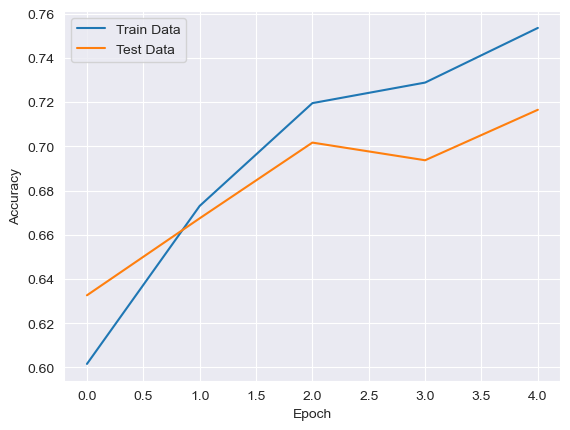

In [75]:
plt.plot(gru_history.history['accuracy'], label='Train Data')
plt.plot(gru_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.7, 1])
plt.legend(loc='best')
plt.show()

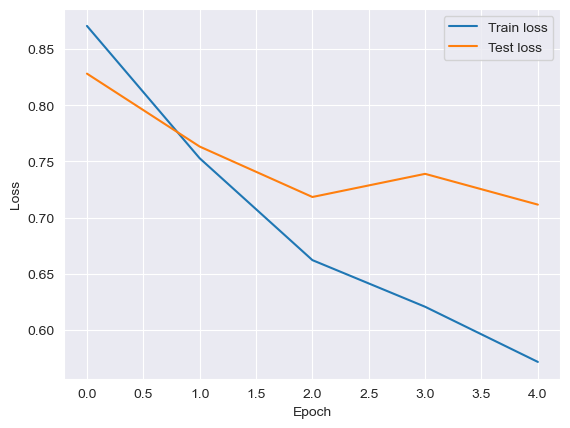

In [76]:
plt.plot(gru_history.history['loss'], label='Train loss')
plt.plot(gru_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [77]:
predictions = gru.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
              precision    recall  f1-score   support

    positive       0.73      0.69      0.71       556
    negative       0.53      0.24      0.33       258
     neutral       0.73      0.86      0.79       939

    accuracy                           0.72      1753
   macro avg       0.66      0.60      0.61      1753
weighted avg       0.70      0.72      0.70      1753



## Fasttext+LSTM

In [78]:
import gensim.downloader as api
glove_gensim  = api.load('fasttext-wiki-news-subwords-300')

[=-------------------------------------------------] 2.5% 23.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.8% 55.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.2% 88.6/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.7% 122.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.2% 155.1/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.5% 206.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.9% 257.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.6% 312.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.4% 368.0/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.3% 415.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.5% 454.9/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.2% 490.9/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.5% 531.6/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.6% 571.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.5% 608.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.2% 644.0/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.8% 678.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.2% 711.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.1% 748.1/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.5% 780.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.0% 814.3/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.5% 848.0/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.1% 882.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 96.0% 919.8/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 958.5/958.4MB downloaded


In [79]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10910 [00:00<?, ?it/s]

In [80]:
ftext = Sequential()
ftext.add(Embedding(input_dim = num_words,
                          output_dim = 300,
                          input_length= X_train_pad.shape[1],
                          weights = [gensim_weight_matrix],
                          trainable = False))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(256,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=False)))
ftext.add(Dense(64,activation='tanh'))
ftext.add(Dense(32,activation='tanh'))
ftext.add(Dense(10,activation='tanh'))
ftext.add(Dense(3,activation='softmax'))

In [81]:
ftext.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       3,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,000 (13.73 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,600,000 (13.73 MB)

In [82]:
ftext.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
ftext_history = ftext.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5307 - loss: 0.9698
Epoch 1: val_accuracy did not improve from 0.71649
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 580ms/step - accuracy: 0.5311 - loss: 0.9692 - val_accuracy: 0.6047 - val_loss: 0.8754
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.6070 - loss: 0.8554
Epoch 2: val_accuracy did not improve from 0.71649
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 621ms/step - accuracy: 0.6073 - loss: 0.8550 - val_accuracy: 0.6207 - val_loss: 0.8387
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.6677 - loss: 0.7633
Epoch 3: val_accuracy did not improve from 0.71649
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 639ms/step - accuracy: 0.6675 - loss: 0.7632 - val_accuracy: 0.6423 - val_loss: 0.7950
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.6893 - loss: 0.7049
Epoch 4: val_accuracy did not improve from 0.71649
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 637ms/step - accuracy: 0.6892 - loss: 0.7052 - val_accuracy: 0.6566

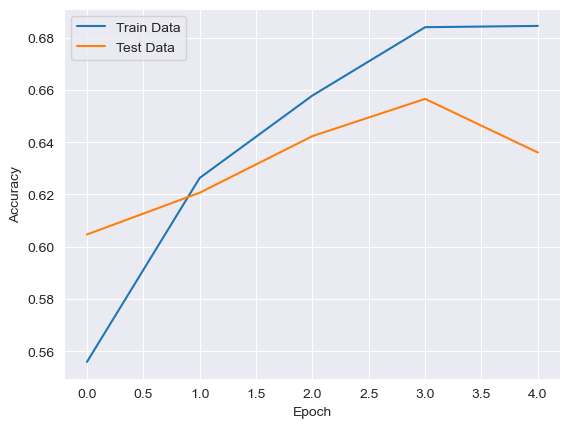

In [84]:
plt.plot(ftext_history.history['accuracy'], label='Train Data')
plt.plot(ftext_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

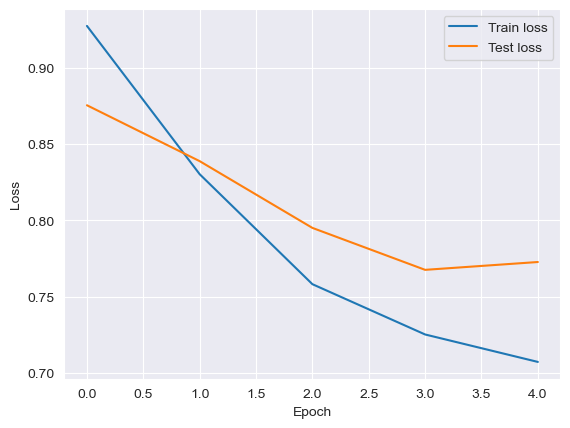

In [85]:
plt.plot(ftext_history.history['loss'], label='Train loss')
plt.plot(ftext_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [86]:
predictions = ftext.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step
              precision    recall  f1-score   support

    positive       0.68      0.55      0.61       556
    negative       0.33      0.53      0.41       258
     neutral       0.76      0.72      0.74       939

    accuracy                           0.64      1753
   macro avg       0.59      0.60      0.58      1753
weighted avg       0.67      0.64      0.65      1753



## Results

|S.No|Vector Embedding|Reccurent layer|Accuracy|
|--|--|--|--|
|1|None|LSTM|65%|
|2|Glove|LSTM|70%|
|3|Glove|GRU|72%|
|4|FastText|LSTM|68%|

# Conclusion

The main goal of the work is to produce a model that is capable of identifying the tone of financial news.This is acheived using RNN models such as LSTM and GRU using various embeddings .It is to be noted that the dataset is not capable enough to identify tone perfectly as classes are imbalanced and best accuracy is produced by GLove+GRU model which is 72%.

The real life application of this work can be useful in various approaches such as automation of financial analysis, extracting profits and loses easily and many more.This work is a beginner step in building more complicated approaches.